# Data Science III CoderHouse [61730]

### Alumno: [Javier Alcoba]

## Análisis de sentimiento de reseñas de películas.

# Descripción del Problema

Conforme aumenta la cantidad de datos obtenidos a través de empresas que quieren maximizar sus ganancias, existe un número creciente de información que se pueden obtener a través de los comentarios que hace la gente en las redes sociales, ya sean opinión sobre política, fútbol o hasta gustos de películas y series.
Para este fin, se utilizan técnicas de lenguaje diseñadas para poder interpretar la polaridad o connotación del mensaje de la persona, para entender si, por ejemplo, le gustó o no una película en particular. Estas técnicas realizan procesamiento de lenguaje natural (PLN).
    
## Objetivo

El objetivo de este proyecto es aplicar técnicas de análisis de sentimiento para clasificar la polaridad de aproximadamente 5,000 reseñas de películas arbitrarias. Se busca determinar, de manera automatizada, si la opinión expresada en cada reseña es positiva o negativa.

## Fuente

Los datos utilizados en este trabajo fueron obtenidos desde el siguiente link:
https://ai.stanford.edu/~amaas/data/sentiment/

### Instalación de Librerías y archivos

En este apartado se dejará cada librería que se utilizó, y que no venía dentro del pack estándar de Python. Además se incluirá las descargas de archivos tales como diccionario de la lengua inglesa, "stop words" etc.
Nota: Se dejan como "raw" para evitar tiempos de ejecución innecesarios.

### Importación de Librerías y Carga de Datos

En este sector se realiza la importación de las librerías que se utilizaron a lo largo del proyecto, así como las funciones que se utilizaron de las mismas

In [9]:
# Para interactuar con el sistema operativo, rutas de archivos y directorios.
import os
# Para generar números aleatorios, y usarlos para obtener de forma aleatoria las reseñas
import random
# Para manipulación y análisis de datos, especialmente con DataFrames.
import pandas as pd
# Para operaciones numéricas, especialmente con arreglos multidimensionales.
import numpy as np
# Para la creación de gráficos y visualizaciones estáticas.
import matplotlib.pyplot as plt
# Para crear visualizaciones estadísticas que se ven mejor incluso que con matplotlib.
import seaborn as sns
# Para trabajar con expresiones regulares y manipulación de cadenas de texto.
import re
# Plataforma para procesamiento de lenguaje natural (NLP).
import nltk
# Descarga de léxico para análisis de sentimiento VADER.
# nltk.download('vader_lexicon')
# Descarga de una base de datos léxica para lematización.
# nltk.download('wordnet')
# Descarga de un etiquetador de partes del discurso.
# nltk.download('averaged_perceptron_tagger_eng')
# Descarga de un tokenizador de sentencias.
# nltk.download('punkt')
# Descarga del listado de palabras en inglés a ser usadas para filtrar.
# nltk.download('words')
# Descarga de las palabras de tipo stopwords a ser usadas para filtrar.
# nltk.download('stopwords')

# Para etiquetar partes del discurso en texto.
from nltk.tag import pos_tag
# Para generar secuencias de N palabras (N-gramas).
from nltk.util import ngrams
# Acceso a la lista de palabras en inglés.
from nltk.corpus import words
# Acceso a la lista de palabras de tipo stopwords.
from nltk.corpus import stopwords
# Para dividir texto en palabras (tokens).
from nltk.tokenize import word_tokenize
# Para reducir palabras a su forma base (lema).
from nltk.stem import WordNetLemmatizer
# Herramienta para análisis de sentimiento basada en VADER.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Otra importación de VADER, a veces se usa esta directamente.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Para generar visualizaciones de nubes de palabras.
from wordcloud import WordCloud

# Para contar elementos en una colección de forma eficiente.
from collections import Counter
# Para convertir una colección de documentos de texto en una matriz de conteo de términos.
from sklearn.feature_extraction.text import CountVectorizer

# Para interactuar con el entorno de IPython/Jupyter.
from IPython import get_ipython
# Para limpiar la salida de una celda en IPython/Jupyter.
from IPython.display import clear_output

# Para dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
# Para evaluar el rendimiento de modelos de clasificación.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Plataforma de código abierto para aprendizaje automático y deep learning.
import tensorflow as tf
# Para construir modelos de red neuronal capa por capa.
from tensorflow.keras.models import Sequential
# Capas comunes para redes neuronales (incrustación, LSTM, densa, dropout).
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# Para vectorizar texto o convertirlo en secuencias.
from tensorflow.keras.preprocessing.text import Tokenizer
# Para asegurar que las secuencias tengan la misma longitud rellenándolas.
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Preparación del dataset

La fuente de datos original cuenta con 50.000 reseñas, siendo la misma cantidad positivas y negativas, distribuidas en 50.000 archivos de extensión .txt dentro de las carpetas train y test. En cada una de dichas carpetas, se separaron en las subcarpetas pos y neg respectivamente.

Para crear un dataset balanceado de 5000 reseñas, se utilizó un código para elegir, aleatoriamente, un archivo dentro de la carpeta pos o neg. Luego se consulta por el balance general (total de reseñas extraídas de esa carpeta dividido en total de muestras (5000). Si dicha proporción alcanzara el valor de 0.6 (3000 reseñas del mismo tipo), se cambiaría la elección a la otra carpeta, evitando un desbalance de mayor que la proporción 60/40.

Luego de obtenidas las 5000 reseñas, se estraería la misma de cada archivo y se almacenaría en un dataset, junto a la columna de sentimiento, fijando en la misma un 0 y el sentimiento era negativo y un 1 si el sentimiento era positivo. De esta forma, se crearía un dataset de 2 columnas y 5000 filas.

El mismo luego se guardaría y, más adelante, se abriría desde Github, cambiando su nombre, para evitar que cada ejecución de este proyecto modifique el dataset a analizar.
A los fines de no generar tiempos innecesarios u errores al procesar los 50000 archivos o no encontrar los mismos al ser ejecutados por fuera de este entorno, se convertirá a "raw" cada cuadro de celda que se usó para crear el dataset balanceado a usar para los fines de análisis de sentimiento.

### Adaptación de la pantalla de la notebook

Se ejecutan los siguientes comandos para mejor representación de las reseñas, ya que de esta forma se podría ver la reseña original y compararla contra la columna de reseña manipulada (minúsculas, regex, etc) y controlar que la preparación de los datos sea correcta.

In [13]:
# Ejecuto comando para que muestre mucho más contenido de la celda, para facilitar análisis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1500)


### Base de datos usada

Se abre la base de datos desde un link de Github, para poder ejecutar este notebook desde otra notebook o desde Google Collab

In [16]:
df_muestra = pd.read_csv('https://raw.githubusercontent.com/ajalcoba/Data_Science_III/refs/heads/main/Muestra_random_resegnas.csv')

##### Se controla además que no haya quedado dentro de ninguna reseña la palabra "spoiler", para estar seguro que la reseña no se trata meramente de contar la película entera, sino que se trata de un análisis crítico real de la película, de forma tal de poder minimizar el error a la hora de aplicar las técnicas de análisis de sentimiento.

In [18]:
df_muestra['reseñas2'] = df_muestra['reseña'].str.lower()
num_reseñas_con_spoiler = df_muestra['reseñas2'].str.contains('spoiler', case=False, na=False).sum()

print(f"Número de reseñas que contienen la palabra 'spoiler': {num_reseñas_con_spoiler}")

Número de reseñas que contienen la palabra 'spoiler': 0


### Datos del dataset usado

In [20]:
df_muestra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5000 non-null   int64 
 1   reseña       5000 non-null   object
 2   sentimiento  5000 non-null   int64 
 3   reseñas2     5000 non-null   object
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


In [21]:
print(f"La cantidad de reseñas positivas representa el {df_muestra['sentimiento'].sum()*100/5000}% del total de reseñas")

La cantidad de reseñas positivas representa el 49.88% del total de reseñas


##### Como se puede ver, se cuenta con un dataset de 5000 reseñas, de las cuales el 49.88% son positivas. Esto muestra el balanceo del mismo.

### Procesamiento de las reseñas

A continuación se procederá a manipular las reseñas, quitando símbolos especiales, agregando espacios luego de puntos, comas o guiones, para asegurar que una vez removidos estos caracteres especiales, no queden palabras unidas entre sí. También se extraerán símbolos utilizados en código html, que parecen haber sido usados en las mismas.

In [25]:
# Función creada para agregar espacios a signos de puntuación, para luego ser reemplazados sin riesgo a dejar palabras unidas.
# Se aprovecha la función para eliminar <br />, código html que se ve presente en varias reseñas

def agregar_espacio_simple(texto):
    
    texto_corregido = texto.replace(",", ", ").replace(".", ". ").replace("-", "- ").replace("<br />","")
    return texto_corregido

df_muestra['reseña_corregida'] = df_muestra['reseña'].apply(agregar_espacio_simple)


##### A continuación se revisa una reseña arbitraria para ver si se encuentra algo nuevo a modificar

In [27]:
df_muestra['reseña_corregida'].head(2)

0    by Dane Youssef "Coonskin" is film,  by the one and only Ralph Bakshi,  is reportedly a satirical indictment of blaxploitation films and negative black stereotypes,  as well as a look at life black in modern America (modern for the day,  I mean- - 1975).  Paramount dropped it like a hot potato that just burst into flame. But this is a Bakshi film,  controversial,  thrilling,  and a must- see almost by definition alone.  Not just another random "shock- jock" of a movie which tries to shock for the sake of shock.  It's by Ralph Bakshi.  Anyone who knows the name knows that if HE made a movie,  he has something big to say. . . Although it's roots are based in cheap blaxploitation,  "Coonskin" isn't just another campy knock- off of mainstream white film or any kind of throwaway flick.  "Coonskin" wants to be more.  It aims it's sights higher and fries some much bigger fish. The movie doesn't just poke fun at the genre.  Nor does it just indict black people,  but actually seems to show

##### A continuación, creo una columna llamada reseña_limpia, en la cual toma el contenido de la columna reseña y le aplica 2 transformaciones. La primera es pasar todos los caracteres A-Z a minúsculas. De esta evito palabras duplicadas pero con mayúsuculas. Luego aplico regex para eliminar todo caracter que no sean de tipo a-z (^a-z) ni de tipo espacio (\s) ya que necesito los espacios para luego separar las palabras. Tuve que agregar áéíóú al regex porque encontré palabras como cliché en las que eliminaba la é...

In [29]:
# Función para extraer símbolos especiales, pero manteniendo las vocales con acento.
df_muestra['reseña_limpia'] = df_muestra['reseña_corregida'].str.lower().apply(lambda x: re.sub(r'[^a-záéíóú\s]', '', x))

In [30]:
df_muestra['reseña_limpia'].head(1)

0    by dane youssef coonskin is film  by the one and only ralph bakshi  is reportedly a satirical indictment of blaxploitation films and negative black stereotypes  as well as a look at life black in modern america modern for the day  i mean    paramount dropped it like a hot potato that just burst into flame but this is a bakshi film  controversial  thrilling  and a must see almost by definition alone  not just another random shock jock of a movie which tries to shock for the sake of shock  its by ralph bakshi  anyone who knows the name knows that if he made a movie  he has something big to say   although its roots are based in cheap blaxploitation  coonskin isnt just another campy knock off of mainstream white film or any kind of throwaway flick  coonskin wants to be more  it aims its sights higher and fries some much bigger fish the movie doesnt just poke fun at the genre  nor does it just indict black people  but actually seems to show love  beauty and heart in the strangest place

##### Como se puede observar, el depurado se está haciendo en forma correcta, manteniendo palabras como cliché, pero eliminando el resto de símbolos especiales.

### BAG of Words

La bolsa de palabras, o "Bag-of-Words" (BoW), es uno de los modelos más simples y fundamentales en el Procesamiento del Lenguaje Natural (PLN) para representar documentos de texto. Su nombre lo describe bastante bien: se considera un texto como una "bolsa" desordenada de palabras, ignorando completamente el orden gramatical y la estructura de las frases, pero manteniendo la información sobre la frecuencia de cada palabra. Esto permite hacer un análisis de sentimiento en función de connotación de las palabras usadas y su frecuencia. Se ayuda enormemente de la nube de palabras, para visualizar de una manera más adecuada cada palabra repetida y cuántas veces está repetida.

In [34]:
# Para esto, hay que inicializar el CountVectorizer
vectorizador = CountVectorizer()

# Luego, hay que ajustar y transformar los datos de la columna 'reseña_limpia'
# Uso fit_transform() para aprender el vocabulario del texto y convertir el texto en una matriz de conteo de palabras.
bow_matrix = vectorizador.fit_transform(df_muestra['reseña_limpia'])

# 'bow_matrix' es una matriz dispersa (sparse matrix) en la cual:
# - Cada fila representará una reseña.
# - Cada columna representará una palabra única (llamada token) del vocabulario.
# - El valor en cada celda será la frecuencia de esa palabra en esa reseña.

# Se convierte la matriz dispersa a un DataFrame de Pandas para una mejor visualización
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizador.get_feature_names_out())

# Para incluir el índice del DataFrame original:
bow_df.index = df_muestra.index

# Vocabulario aprendido:
vocabulario = vectorizador.vocabulary_
print("Vocabulario:", len(vocabulario))

# Forma de la matriz Bag of Words (número de reseñas, número de palabras únicas):
print("\nForma de la matriz Bag of Words:", bow_matrix.shape)

Vocabulario: 41181

Forma de la matriz Bag of Words: (5000, 41181)


##### Como la "bolsa de palabras" tiene más de 41181 palabras, se aplicará un filtro contra un corpus de palabras en inglés. Se esta forma, se podrá eliminar todas las palabras que no pertenezcan al corpus en inglés

In [36]:
# Se carga un archivo de corpus de palabras en inglés
english_words = set(words.words())

In [37]:
# Se obtiene la lista de palabras (nombres de las columnas) del Bag of Words
vocabulario_bow = bow_df.columns

In [38]:
# Se crea una lista de palabras filtrada compuesta sólo por palabras en inglés
palabras_inglesas_bow = [palabra for palabra in vocabulario_bow if palabra in english_words]


In [39]:
# Se crea un nuevo DataFrame Bag of Words solo con las columnas de palabras en inglés
bow_df_ingles = bow_df[palabras_inglesas_bow]

print("Forma del Bag of Words original:", bow_df.shape)
print("Forma del Bag of Words solo con palabras en inglés:", bow_df_ingles.shape)
print("\nPrimeras 5 columnas del Bag of Words en inglés:\n", bow_df_ingles.iloc[:, :5].head())

Forma del Bag of Words original: (5000, 41181)
Forma del Bag of Words solo con palabras en inglés: (5000, 17423)

Primeras 5 columnas del Bag of Words en inglés:
    aa  aback  abandon  abandoned  abandonment
0   0      0        0          0            0
1   0      0        0          0            0
2   0      0        0          0            0
3   0      0        0          0            0
4   0      0        0          0            0


##### Como se puede observar, se redujo la cantidad de palabras, de más de 40000 a alrededor de 17000

### Lematización

A continuación, y junto al proceso de depuración de la información, se procede a reemplazar cada palabra dentro de la bolsa de 17000 palabras a la forma base de la misma. Por ejemplo: corriendo, correrá, corría, corres...su forma base es "correr". De esta forma, se puede encontrar mayor frecuencia de usos de las palabras base, reduciendo el tamaño de la bolsa y aumentando la frecuencia de cada palabra base que se encuentre repetida.

Para lograr esto, se utilizará la librería pos_tag de nltk. Esta librería genera etiquetas de 3 o más letras en mayúsculas que representan el tipo de palabra que se está analizando, así como su conjugación. Por ejemplo, si la palabra analizada fuera "eaten (comido)", la etiqueta POS y su significado serían "VBN": Verb, past participle (Verbo, participio pasado). La primera letra de la etiqueta es la más importante, a la hora de poder aplicar el lematizador, ya que indica si la palabra que se tiene es verbo, adjetivo, adverbio, sustantivo, etc. Luego, se hace un diccionario de adaptación para igualar las letras de pos_tag con la letra equivalente en la librería de lematización. Por ejemplo, un adjetivo se representa con la "A" en pos_tag, pero como "j" en el lematizador.

Finalmente, se devuelve la bolsa de palabras lematizada.

In [43]:
# Función de lematización a aplicar a las palabras
def lematizar_diccionario_nltk(frecuencia_palabras):
    # librería de lematización utilizada
    lemmatizer = WordNetLemmatizer()

    # Inicialización de diccionario a utilizar como retorno de la función
    frecuencia_palabras_lematizada = {}
    
    for palabra, frecuencia in frecuencia_palabras.items():
        # Se tokeniza cada palabra para luego aplicar el etiquetado POS
        tokens = word_tokenize(palabra)
        # Se usa if token para controlar que cada token no esté vacío
        if tokens:
            # Se guarda la primera letra en forma minúscula de la etiqueta pos_tag de la palabra analizada en la variable tag
            tag = pos_tag(tokens)[0][1][0].lower()
            # Diccionadrio de equivalencias entre librerías.
            tag_map = {'j': 'a', 'v': 'v', 'r': 'r', 'n': 'n'}
            # Usando el diccionario de equivalencias, se usa la funcion lemmatiza de la librería para devolver la forma base de la palabra analizada
            lema = lemmatizer.lemmatize(palabra, tag_map.get(tag, 'n'))
            # Luego se calcula la nueva frecuencia de cada palabra lematizada
            frecuencia_palabras_lematizada[lema] = frecuencia_palabras_lematizada.get(lema, 0) + frecuencia
    return frecuencia_palabras_lematizada

### Nube de palabras

Las nubes de palabras (word clouds) son una forma muy popular y visual de representar la frecuencia de las palabras en un texto o un conjunto de textos. Son una herramienta de visualización de datos que permite identificar rápidamente los términos más prominentes y repetidos en un corpus.

A continuación, se preparará el gráfico de nube de palabras, con las 20 palabras que tengan mayor frecuencia de la bolsa de palabras en inglés lematizadas.

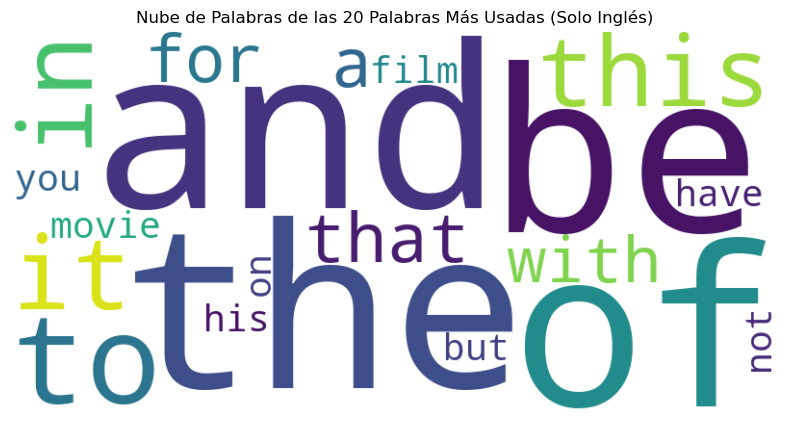


Las 20 palabras más usadas (solo inglés, sin stopwords) y sus frecuencias:
 [('the', 66038), ('be', 47126), ('and', 31892), ('of', 28628), ('to', 26611), ('it', 20509), ('in', 18145), ('this', 14843), ('that', 13455), ('a', 9210), ('for', 8790), ('with', 8550), ('movie', 8470), ('but', 8330), ('film', 7759), ('have', 7670), ('on', 6675), ('not', 5853), ('you', 5822), ('his', 5691)]


In [46]:
# Se suma las frecuencias de cada palabra en todas las reseñas
frecuencia_palabras = bow_df_ingles.sum(axis=0).sort_values(ascending=False)

# Se aplica la función de lematización definida en la celda de arriba
frecuencia_palabras_lematizada_nltk = lematizar_diccionario_nltk(frecuencia_palabras)

# Se convierte el diccionario a un contador
contador_lematizado = Counter(frecuencia_palabras_lematizada_nltk)

# Se obtienen las 20 palabras más usadas
top_20_frecuencias = contador_lematizado.most_common(20)
top_20_palabras = [palabra for palabra, frecuencia in top_20_frecuencias]

# Se crea la cadena de texto para la nube de palabras
texto_nube = ' '.join(top_20_palabras)

# Se crea la nube de palabras
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords='',
                      min_font_size=10).generate(texto_nube)

# Se muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de las 20 Palabras Más Usadas (Solo Inglés)')
plt.show()
# Se muestran las 20 palabras sin stopwords más usadas y sus frecuencias
print("\nLas 20 palabras más usadas (solo inglés, sin stopwords) y sus frecuencias:\n", top_20_frecuencias)

##### Como se puede observar, las palabras más usadas no expresan mucho sobre sentimientos, sino que son más que nada conectores. Por tal motivo, se quitarán del conjunto de palabras las de tipo "stop words", lo que debería depurar mejor la nube de palabras.

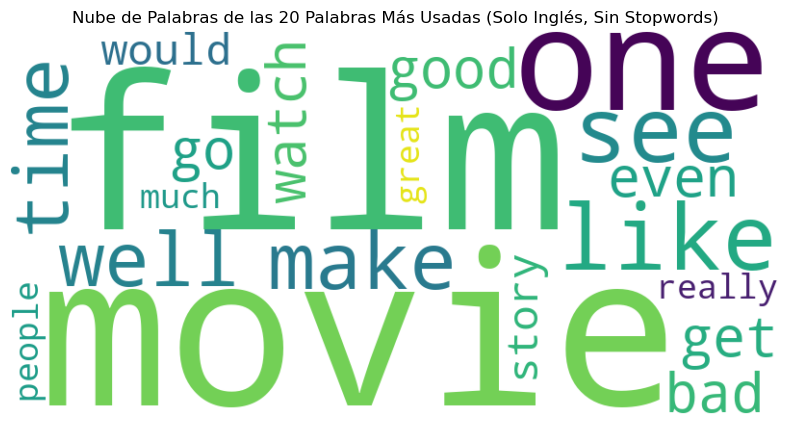


Las 20 palabras más usadas (solo inglés, sin stopwords) y sus frecuencias:
 [('movie', 8470), ('film', 7759), ('one', 5186), ('like', 4012), ('see', 3971), ('make', 3804), ('well', 3239), ('time', 3133), ('good', 3075), ('get', 2833), ('watch', 2719), ('go', 2708), ('bad', 2663), ('even', 2512), ('would', 2368), ('story', 2344), ('really', 2251), ('much', 1949), ('great', 1835), ('people', 1798)]


In [48]:
# Se crea un nuevo diccionario para almacenar las frecuencias sin stopwords
frecuencia_palabras_sin_stopwords = {}

# Se carga un archivo de corpus de "stopwords" en inglés
stop_words_ingles = set(stopwords.words('english'))

# Se itera a través de la serie 'frecuencia_palabras'
for palabra, frecuencia in frecuencia_palabras.items():
    # Verificar si la palabra no está en el conjunto de stopwords
    if palabra not in stop_words_ingles:
        frecuencia_palabras_sin_stopwords[palabra] = frecuencia


# Se lematiza el nuevo diccionario sin las "stopwords"
frecuencia_palabras_lematizada_sin_stop = lematizar_diccionario_nltk(frecuencia_palabras_sin_stopwords)

# Se convierte el diccionario a un Counter
contador_lematizado_stop = Counter(frecuencia_palabras_lematizada_sin_stop)

# Se obtienen las 20 palabras con mayor frecuencia
top_20_frecuencias_sw = contador_lematizado_stop.most_common(20)
top_20_palabras_sw = [palabra for palabra, frecuencia in top_20_frecuencias_sw]

# Se crea la cadena de texto para la nube de palabras
texto_nube = ' '.join(top_20_palabras_sw)

# Se crea la nube de palabras nueva sin stopwords
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords='', # También se pueden pasar aquí para asegurar
                      min_font_size=10).generate(texto_nube)

# 6. Se grtafica la nueva nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de las 20 Palabras Más Usadas (Solo Inglés, Sin Stopwords)')
plt.show()

# Se muestran las 20 palabras sin stopwords más usadas y sus frecuencias
print("\nLas 20 palabras más usadas (solo inglés, sin stopwords) y sus frecuencias:\n", top_20_frecuencias_sw)

##### Como se puede observar, mejoró mucho la calidad de las palabras más repetidas, aunque se nota mucho espacio de mejora. Por ejemplo, se podrían eliminar palabras como film o movie, que lógicamente se encuentran entre las más usadas y es natural, siendo que se están realizando reseñas sobre películas. Por otro lado, y teniendo en cuenta que se ven palabras positivas y negativas dentro de la nube, se puede aprovechar y atacar 2 puntos en una misma instancia. Es decir, se podrían crear bigramas que probablemente hará que palabras como film o movie ya no estén en el Top 20. A su vez, y para poder analizar mejor las palabras, se separarían las reseñas cuyo sentimiento sea positivo de aquellas en el que sea negativo.

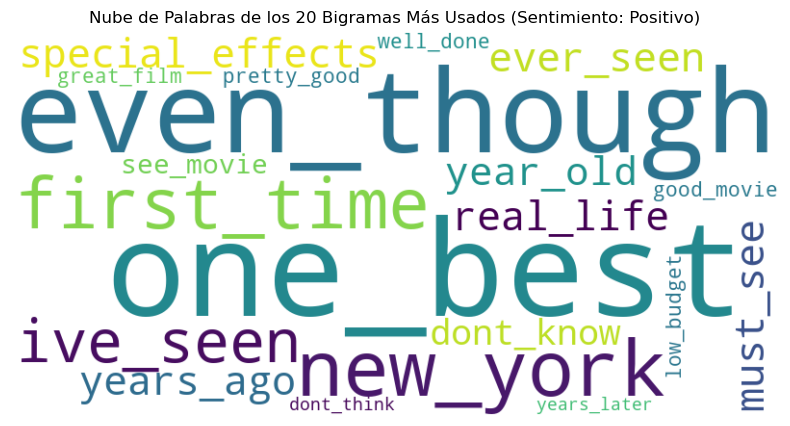


Los 20 bigramas más usados (sentimiento: Positivo):
 [(('one', 'best'), 145), (('even', 'though'), 115), (('new', 'york'), 111), (('first', 'time'), 102), (('ive', 'seen'), 102), (('special', 'effects'), 98), (('real', 'life'), 95), (('ever', 'seen'), 92), (('years', 'ago'), 80), (('must', 'see'), 75), (('year', 'old'), 71), (('dont', 'know'), 70), (('see', 'movie'), 69), (('pretty', 'good'), 66), (('good', 'movie'), 65), (('great', 'film'), 64), (('well', 'done'), 64), (('low', 'budget'), 63), (('years', 'later'), 62), (('dont', 'think'), 60)]


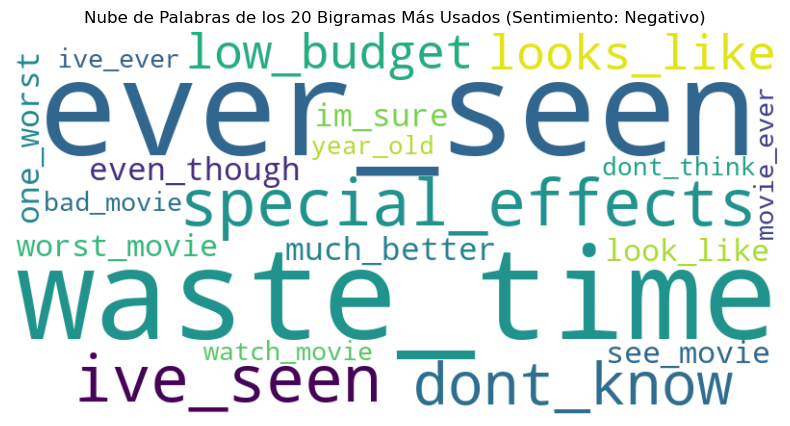


Los 20 bigramas más usados (sentimiento: Negativo):
 [(('ever', 'seen'), 170), (('waste', 'time'), 151), (('special', 'effects'), 141), (('ive', 'seen'), 139), (('dont', 'know'), 115), (('low', 'budget'), 113), (('looks', 'like'), 109), (('even', 'though'), 108), (('one', 'worst'), 95), (('im', 'sure'), 93), (('much', 'better'), 93), (('worst', 'movie'), 89), (('look', 'like'), 88), (('see', 'movie'), 83), (('watch', 'movie'), 82), (('bad', 'movie'), 82), (('ive', 'ever'), 81), (('movie', 'ever'), 77), (('dont', 'think'), 75), (('year', 'old'), 75)]


In [50]:
# Se separa el dataset por sentimiento
df_positivas = df_muestra[df_muestra['sentimiento'] == 1]['reseña_limpia'].astype(str).tolist()
df_negativas = df_muestra[df_muestra['sentimiento'] == 0]['reseña_limpia'].astype(str).tolist()

# Función para generar la nube de bigramas
def generar_nube_bigramas(lista_textos, sentimiento):
    bigram_counts = Counter()
    for texto in lista_textos:
        tokens = word_tokenize(texto.lower())
        # Filtrado de stopwords.
        tokens_sin_sw = [token for token in tokens if token not in stop_words_ingles and token.isalnum()]
        bigramas = ngrams(tokens_sin_sw, 2)
        bigram_counts.update(bigramas)

    # Se obtienen los 20 bigramas de mayor frecuencia

    top_20_bigramas = bigram_counts.most_common(20)
    texto_nube_bigramas = ' '.join(['_'.join(bigrama) for bigrama, frecuencia in top_20_bigramas])

    wordcloud_bigramas = WordCloud(width=800, height=400,
                                   background_color='white',
                                   collocations=False,
                                   min_font_size=10).generate(texto_nube_bigramas)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_bigramas, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Nube de Palabras de los 20 Bigramas Más Usados (Sentimiento: {sentimiento})')
    plt.show()

    print(f"\nLos 20 bigramas más usados (sentimiento: {sentimiento}):\n", top_20_bigramas)

# Se llama a la función que genera nubes de palabras de bigramas para el dataset de reseñas positivas y el de negativas
generar_nube_bigramas(df_positivas, 'Positivo')
generar_nube_bigramas(df_negativas, 'Negativo')

##### Como se puede observar en las nubes de palabras resultantes, los pares de palabras con mayor tamaño son, por ejemplo, one_best, even_though, first_time y New_York en las positivas y waste_time, ever_seen, ive_seen y special_effects en las negativas. Si bien frases como one_best o waste_time son claros indicios de comentarios positivos y negativos respectivamente...se pueden ver también que palabras como ive_seen y ever_seen se encuentran en ambas nubes. Esto lógicamente implica que reseñas como "The best I've seen" o "The worst I've seen" significan sentimientos diametralmente opuestos, cambiando sólo una palabra en la frase (best por worse), lo que también aplica al bigrama "ever_seen". Otro bigrama como "special effects" se encuentra en ambas nubes por la misma razón. Uno podría inferir que una película fue buena o mala dependiendo del nivel de efectos especiales usados.

### Análisis de sentimiento con Vader Sentiment

VADER (Valence Aware Dictionary and sEntiment Reasoner) es una herramienta de análisis de sentimiento que se basa en un léxico (diccionario) y un conjunto de reglas predefinidas. Fue desarrollada específicamente para analizar el sentimiento en textos de redes sociales y lenguaje informal, lo que la hace muy útil para comentarios, tweets, y sí, ¡también reseñas de películas!

A diferencia de los modelos de aprendizaje automático que necesitan ser entrenados con grandes volúmenes de datos etiquetados, VADER ya viene "pre-entrenado" con un diccionario de palabras a las que se les ha asignado una puntuación de sentimiento (conocida como "valencia").

A continuación, se hará uso de una librería de análisis de sentimiento de Vader Sentiment, que analizará cada reseña y en función de las palabras usadas y su repetición, determinará si la misma es de tipo positiva o negativa. Luego, se compararán los resultados obtenidos contra los datos de la columna "sentimiento", que cuenta ya con la etiqueta sentimental de cada reseña. De esta forma, se determinará la precisión del modelo. Para poder comparar contra la columna original de sentimiento, se creará la función categorizar_sentimiento. Como la columna categoría orignal del proyecto tiene 2 valores: 1 para positivo y 0 para negativo, el objetivo de la función es el de adaptar los resultados obtenidos por Vader a esos 2 valores. Es decir, los valores flotantes entre -1 y 0 serán negativos y se les asignará el 0, mientras que los valores entre 0 y 1 serán positivos y se les asignará el 1.

In [54]:
# Más información sobre el analizador de sentimiento llamado Vader Sentiment
# https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

# Se inicializa el analizador de sentimiento VADER
analizador = SentimentIntensityAnalyzer()

# Función para obtener el sentimiento compuesto
def obtener_sentimiento(texto):
    vs = analizador.polarity_scores(texto)
    return vs['compound']

# Se crea una columna nueva (sentimiento_analizado) para almacenar el análisis de sentimiento obtenido por VADER
df_muestra['sentimiento_analizado'] = df_muestra['reseña_limpia'].apply(obtener_sentimiento)

# Runción para adaptar los resultados del analizador Vader (valores flotantes entre -1 (negativo) y 1  (positivo)
def categorizar_sentimiento(compound):
    if compound >= 0:
        return int(1)
    else:
        return int(0)
    

# Acá se aplica la fórmula para obtener la columna a comparar (categoria_sentimiento) contra la columna sentimiento original (sentimiento)
df_muestra['categoria_sentimiento'] = df_muestra['sentimiento_analizado'].apply(categorizar_sentimiento)


##### Una vez adaptados los valores obtenidos por el analizador de sentimientos, se procederá a comparar uno a uno contra los valores que vienen con el dataset de reseñas.

Precisión del analizador de sentimiento: 0.70

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.54      0.64      2506
           1       0.65      0.85      0.74      2494

    accuracy                           0.70      5000
   macro avg       0.72      0.70      0.69      5000
weighted avg       0.72      0.70      0.69      5000



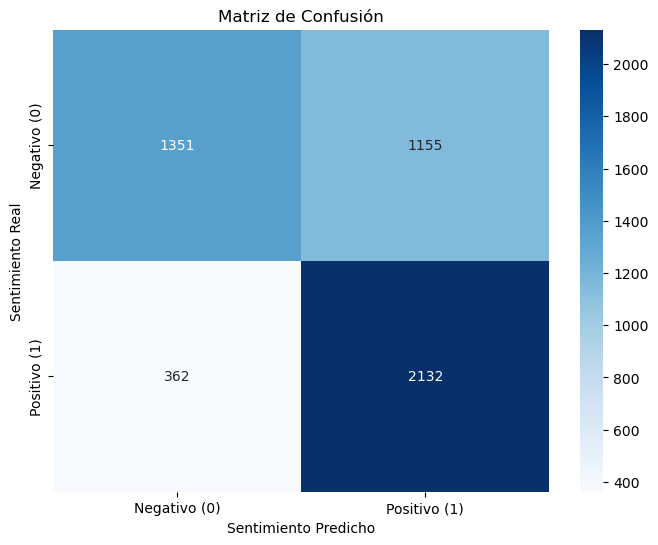

In [56]:
# Columna extra creada con el resultado de la comparación. Valdrá 1 si la comparación es idéntica y 0 si no hubo acierto.
df_muestra['control_aciertos'] = (df_muestra['sentimiento'] == df_muestra['categoria_sentimiento']).astype(int)

# Variable de Total de filas
total_filas = len(df_muestra)

# Para determinar la cantidad de casos acertados, no se necesita más que sumar los valores de la columna 'control_aciertos' creada.
aciertos = df_muestra['control_aciertos'].sum()

# Se calcula el porcentaje de aciertos usando las variables creadas en los pasos previos
porcentaje_acierto = (aciertos / total_filas) * 100

# Se compara el sentimiento predicho con el sentimiento real
accuracy = accuracy_score(df_muestra['sentimiento'], df_muestra['categoria_sentimiento'])
print(f"Precisión del analizador de sentimiento: {accuracy:.2f}")

print("\nReporte de Clasificación:")
print(classification_report(df_muestra['sentimiento'], df_muestra['categoria_sentimiento']))

# Matriz de Confusión
cm = confusion_matrix(df_muestra['sentimiento'], df_muestra['categoria_sentimiento'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Sentimiento Predicho')
plt.ylabel('Sentimiento Real')
plt.title('Matriz de Confusión')
plt.show()
    


##### Como se puede observar, se tuvo un porcentaje no muy bueno a la hora de predecir la precisión del modelo a la hora de detectar sentimiento. Esto puede verse influido con la cantidad de texto incluido en cada reseña que, por lo que se puede ver en las palabras presentes en las nubes de palabras positivas y negativas, hay muchas frases ambiguas presentes en las reseñas, que podrían significar que las mismas no sólo muestran sólo lo bueno o malo de una película, sino que harían un análisis más exhaustivo de la misma, para aplicar un análisis más profundo, y no un comentario básico de una línea de sentimiento binario de tipo: "Me gustó la película" o "La película es muy mala".

##### En particular, el peor cuadrante de la matriz de confusión es el de falso positivo. Se realizará el análisis de una reseña arbitraria que el analizador haya definido como positiva, pero cuyo sentimiento verdadero es negativo, para tratar de determinar una explicación sobre por qué puede haber errado el analizador. 

### Heterogeneidad de una reseña no acertada

A continuación se muestra un ejemplo de una reseña en la que el analizador de sentimientos falló al intentar determinar si la misma era positiva o no. 

In [60]:
df_muestra['reseña_limpia'][10]

'we had starz free weekend and i switched on the station to see what was on   it was this movie howling ii the acting was terrible but the eye candy was great  sybil danning and marsha brown as the afore mentioned eye candy  i was laughing a lot from the few scenes i saw my friends wonder why i never want to go to horror movies   if they saw this film they would know why  i would get thrown out for laughing so hard just a couple of trivia notes  reb brown who played ben white had played captain american in a made for tv movie marsha brown was mick jaggers inspiration for the song brown sugar mick has great taste in women for sure '

#### Valores de sentimiento analizados vs originales para dicha reseña

In [62]:
df_muestra['sentimiento'][10]

0

Sentimiento negativo real de la reseña 11 (se cuenta desde 0) 

In [64]:
df_muestra['categoria_sentimiento'][10]

1

Sentimiento positivo obtenido a través del analizador para la reseña 11 

In [66]:
df_muestra['sentimiento_analizado'][10]

0.9864

Valor de sentimiento positivo preciso obtenido por el analizador

##### Como se puede ver en el valor de la columna 'sentimiento_analizado', el analizador predijo un positivismo casi absoluto (por su gran proximidad al valor 1). Esto indica que la falla de predicción no fue pequeña, sino bastante grosa. Por tal motivo, se analizó la reseña para tratar de determinar qué motivo pudo haber llevado a confundir de tal manera al analizador.
##### El análisis sobre la reseña mostró datos muy interesantes. Por ejemplo, la reseña trata sobre una película de terror aparentemente bastante cliché con el género y cuya actuación, de acuerdo a nuestro cinéfilo, resultó terrible. Si bien esto sería material suficiente para determinar la negatividad de la opinión. No obstante, lo que viene a continuación explica el por qué de la confusión del analizador. Pasa que, luego de aclarar que se trata de otra película de terror con actuación mediocre. Resulta que esta persona, dejando de lado el análisis, se rió durante toda la película, al mejor estilo de "sharknado", película que exagera la realidad al mezclar un tornado de tiburones. Dicho estilo de películas generan risa más allá de la mala actuación, efectos especiales escasos o nulos, y producción de baja calidad. A su vez, otra de las palabras encontradas en la reseña son:
##### "eye candy", para indicar la belleza notable de las actrices que actúan.
##### "inspiration", para comparar un actor con Mick Jagger respecto a una canción que canta.
##### "great taste", pero haciendo alusión al gusto por las mujeres que tenía un personaje.

##### En resumen, se tiene una palabra negativa (terrible) que hace alusión al gusto en general por la película, y luego varias palabras positivas (incluyendo un pero (but) luego de la palabra negativa) que hacen alusión a detalles que nada tienen que ver con la película en sí, sino con los actores, etc, acompañado por la palabra reir (laugh) que aparece 2 veces en la reseña. Es natural suponer por qué el analizador de sentimiento la pasa tan mal analizando la reseña. La negatividad está bastante disfrazada de sarcasmo y los comentarios positivos (e innecesarios de la reseña) superan ampliamente al único comentario negativo que usó una palabra negativa.

### Análisis de sentimiento a través de Deep Learning

El aprendizaje profundo (Deep Learning) ha revolucionado el campo del Procesamiento del Lenguaje Natural (PLN), y el análisis de sentimiento no es la excepción. A diferencia de los enfoques tradicionales basados en léxicos (como VADER) o en modelos de aprendizaje automático clásicos (como Bag-of-Words con SVM o Naive Bayes), el Deep Learning permite a los modelos aprender representaciones complejas y características directamente de los datos crudos de texto.

El corazón del Deep Learning para PLN radica en las redes neuronales con múltiples capas (de ahí "profundo"). En el análisis de sentimiento, el proceso general es el siguiente proceso: En lugar de representar palabras como simples conteos (como en BoW), el Deep Learning comienza con embeddings de palabras. Estos son vectores de números reales que capturan el significado semántico y las relaciones contextuales de las palabras. Palabras con significados similares (ej., "bueno" y "excelente") estarán más cerca en este espacio vectorial. Pueden ser pre-entrenados con grandes corpus de texto (ej: Word2Vec, GloVe, FastText) o aprendidos durante el entrenamiento del propio modelo de Deep Learning.

Esta es una mejora crucial sobre BoW, ya que las redes neuronales pueden ahora "entender" las palabras en un contexto más rico. Una vez que las palabras están incrustadas en vectores, estos se alimentan a diferentes tipos de arquitecturas de redes neuronales, cada una con sus fortalezas para capturar patrones en secuencias de texto, a través de: Redes Neuronales Recurrentes (RNNs) y sus variantes (LSTM, GRU):

RNNs: Son ideales para datos secuenciales como el texto porque tienen "memoria". Pueden procesar una palabra a la vez, manteniendo un estado interno que representa la información de las palabras anteriores en la secuencia.

Long Short-Term Memory (LSTM) y Gated Recurrent Units (GRU): Son variantes avanzadas de RNNs que resuelven el problema de la "desaparición del gradiente" (vanishing gradient) en RNNs tradicionales, lo que les permite capturar dependencias a largo plazo en el texto (ej., cómo una opinión expresada al principio de una reseña influye en el sentimiento general). Son excelentes para entender el flujo y el contexto de las frases.

Redes Neuronales Convolucionales (CNNs) para texto:
Aunque son famosas por el procesamiento de imágenes, las CNNs también son muy efectivas en texto. Utilizan "filtros" que se deslizan sobre ventanas de palabras (como n-gramas) para detectar patrones locales, como frases clave o combinaciones de palabras que indican un sentimiento específico (ej., "no está mal").

Capa de Salida:
Finalmente, las representaciones aprendidas por la red neuronal se pasan a una capa de salida (generalmente una capa densa con una función de activación como softmax o sigmoide) que produce la predicción de sentimiento (ej., positivo, negativo, neutral o incluso un espectro de emociones).

Por todo lo anteriormente expresado, se estimo que se tendrá mejores resultados usando este método para analizar sentimiento en las reseñas.


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5021 - loss: 0.6934 - val_accuracy: 0.5333 - val_loss: 0.6912
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6428 - loss: 0.6567 - val_accuracy: 0.7360 - val_loss: 0.5572
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8731 - loss: 0.3720 - val_accuracy: 0.7613 - val_loss: 0.5912
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9311 - loss: 0.2268 - val_accuracy: 0.7747 - val_loss: 0.5849
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9420 - loss: 0.1733 - val_accuracy: 0.7747 - val_loss: 0.6944
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9818 - loss: 0.0851 - val_accuracy: 0.7613 - val_loss: 0.8166
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9696 - loss: 0.1459 - val_accuracy: 0.7560 - val_loss: 0.9883
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9870 - loss: 0.0618 - val_accu

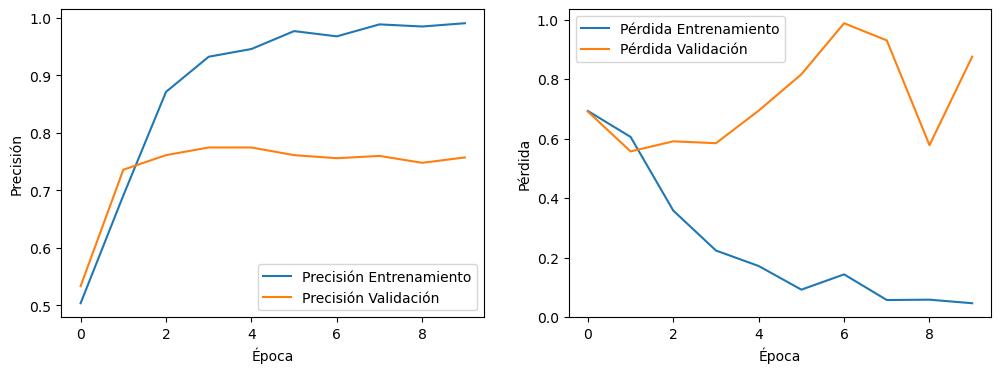

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Precisión del modelo Deep Learning en el conjunto de prueba: 0.79

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       366
           1       0.84      0.72      0.77       384

    accuracy                           0.79       750
   macro avg       0.79      0.79      0.79       750
weighted avg       0.79      0.79      0.79       750



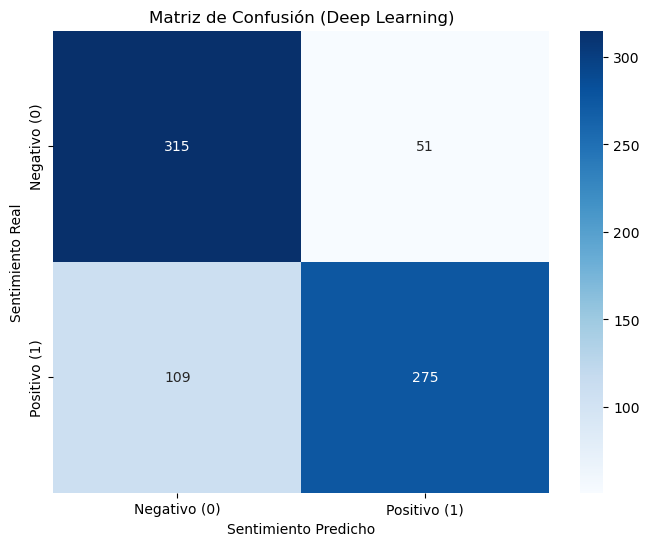

In [71]:
# Se preparación del Dataset
reseñas = df_muestra['reseña'].astype(str).tolist()
sentimientos = df_muestra['sentimiento'].tolist()

# Tokenizador
max_palabras = 10000  # Tamaño máximo del vocabulario
tokenizer = Tokenizer(num_words=max_palabras, oov_token="<OOV>")
tokenizer.fit_on_texts(reseñas)

# Se realizan secuencias y padding
secuencias = tokenizer.texts_to_sequences(reseñas)
max_longitud = 100  # Longitud máxima de cada secuencia (ajustar según tu dataset)
secuencias_padded = pad_sequences(secuencias, maxlen=max_longitud, padding='post', truncating='post')

# División del Dataset en entrenamiento, test y control de resultados
X_train, X_temp, y_train, y_temp = train_test_split(secuencias_padded, sentimientos, test_size=0.3, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

# Se convierten a arreglos de NumPy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Construcción del Modelo
embedding_dim = 16  # Dimensión del embedding

# Se modificaron los parámetros usados por otros que dieron mejores resultados
# model = Sequential([
# Dense(128, activation='relu'),
#Dropout(0.5), # apaga el 50 % de las neuronas al azar
#Dense(64, activation='relu'),
#Dropout(0.5),
#Dense(1, activation='sigmoid')
#])

# Parámetros del modelo a usar
model = Sequential([
    Embedding(max_palabras,  
    embedding_dim), LSTM(32), Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilación del Modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del Modelo a través de epoches (número de retroalimentaciones
epochs = 10
batch_size = 32

# Preparación de modelo
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

# Visualización el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluación del Modelo
predicciones = model.predict(X_test)
predicciones_binarias = [1 if p > 0.5 else 0 for p in predicciones]

accuracy = accuracy_score(y_test, predicciones_binarias)
print(f"\nPrecisión del modelo Deep Learning en el conjunto de prueba: {accuracy:.2f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones_binarias))

# Matriz de Confusión
cm = confusion_matrix(y_test, predicciones_binarias)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Sentimiento Predicho')
plt.ylabel('Sentimiento Real')
plt.title('Matriz de Confusión (Deep Learning)')
plt.show()

##### Como se puede notar en los epochs usados, se comienza con una precisión en 0.5011 (Epoch 1/10) y aumenta constantemente con cada iteración hasta 0.9910 (Epoch 10/10). Esto indica que el modelo está aprendiendo muy bien a clasificar los datos en los que se entrena.
##### Por otrol Un accuracy del 99.1% al final es excepcionalmente alto, lo que podría sugerir un posible sobreajuste (overfitting) si la precisión de validación no sigue la misma tendencia.

##### Respecto a la precisión de valoración, la misma empieza en 0.5760 (Epoch 1/10), aumenta hasta 0.7827 (Epoch 7/10), pero luego, parece estabilizarse o incluso disminuir ligeramente al final, llegando a 0.7600 (Epoch 10/10).

##### Hay una clara brecha creciente entre la precisión de entrenamiento y la precisión de validación a partir de la Epoch 3 o 4. Esto parece ser un indicio de un fuerte sobreajuste (overfitting). El modelo estaría memorizando los datos de entrenamiento en lugar de aprender patrones generalizables para datos nuevos y no vistos. La precisión de validación se estanca o incluso cae mientras la de entrenamiento sigue mejorando drásticamente.

##### Finalmente, revisando la matriz de confusión, se ve mucho mejor en resultados respecto a la matriz de confusión cuando se utilizó Vader, especialmente para el caso de falsos positivos, lo que haría a esta solución la mejor alternativa entre las usadas para realizar análisis de sentimiento.

### Conclusiones

A lo largo de este proyecto, se ha empleado una estrategia multifacética para el análisis de sentimiento de reseñas de películas, progresando desde enfoques exploratorios y basados en reglas, hasta la implementación de modelos de aprendizaje profundo más sofisticados.

Inicialmente, la aplicación de Bag-of-Words (BoW), combinada con la generación de nubes de palabras, proporcionó una primera y valiosa aproximación visual al contenido de las reseñas. Aunque BoW simplifica la estructura del texto al ignorar el orden de las palabras, su utilidad radica en su capacidad para transformar datos textuales complejos en una representación numérica manejable. Las nubes de palabras, por su parte, demostraron ser una herramienta exploratoria intuitiva, permitiendo identificar rápidamente los términos y temas más recurrentes en el corpus de reseñas, y así obtener una comprensión inicial de los aspectos que los usuarios más resaltan en sus opiniones. Este análisis visual preliminar es fundamental para contextualizar las percepciones generales del público.

Posteriormente, se implementó el análisis de sentimiento utilizando VADER Sentiment. Este enfoque basado en léxicos y reglas predefinidas resultó ser una solución eficiente y práctica, especialmente adecuada para el lenguaje informal que a menudo caracteriza las reseñas de redes sociales. VADER permitió clasificar la polaridad de cada reseña (positiva o negativa) de manera rápida y sin la necesidad de un entrenamiento extensivo, ofreciendo una base sólida para la cuantificación del sentimiento expresado. Su capacidad para manejar intensificadores y negaciones le otorgó una ventaja significativa sobre conteos de palabras simples. Desgraciadamente, el tipo de reseñas que se tenía dentro del dataset probó ser más compleja que lo normal, lo que hizo que no tuviera un buen porcentaje de aciertos...un mero 70%.

Finalmente, para profundizar en la complejidad y la sutileza del lenguaje, se exploró el análisis de sentimiento a través de Deep Learning. Este paso representó una evolución metodológica, permitiendo ir más allá de las representaciones superficiales (BoW) y las reglas fijas (VADER). Mediante el uso de embeddings de palabras y arquitecturas de redes neuronales (como RNNs/LSTMs o Transformers), los modelos de Deep Learning son capaces de capturar el contexto, las relaciones semánticas y las dependencias a largo plazo dentro de las reseñas. Esto posibilita una comprensión más matizada del sentimiento, potencialmente detectando sarcasmo, ironía y otras complejidades lingüísticas que los métodos más simples podrían pasar por alto. Aunque más demandantes en recursos y datos, los modelos de Deep Learning prometen una mayor precisión y una capacidad de generalización superior en la identificación del agrado o desagrado del usuario hacia una película. Afortunadamente, el nivel de sarcasmo que logró confundir más de una vez al análisis Vader no tuvo práctivamente ninguna injerencia al ser evaluado por este analizador de sentimiento, llegando a iteraciones de aciertos mayor al 99%. No obstante, hay que considerar el hecho de que haya habido una gran parte de overfitting, ya que el resultado fue demasiado bueno.

En conjunto, esta progresión metodológica ha permitido abordar el análisis de sentimiento desde múltiples perspectivas, comenzando con una exploración visual y cuantitativa básica, para luego avanzar hacia una comprensión más profunda y contextual del sentimiento expresado en las reseñas de películas.